**Cuprite Dataset Labeling using Cosine Similarity**

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

```python
This code cell imports the necessary Python packages for working with the Cuprite dataset. Here's a brief explanation of each package:

scipy.io is a package for working with input and output in various formats such as .mat, .wav, .arff, etc.
numpy is a package for scientific computing in Python and provides support for arrays and matrices.
matplotlib.pyplot is a package for creating static, animated, and interactive visualizations in Python.

```

In [2]:
Cuprite_file=scipy.io.whosmat('Cuprite.mat')
print(Cuprite_file)

[('X', (512, 614, 224), 'int16')]


```python
This code cell reads the .mat file containing the Cuprite dataset using the scipy.io.whosmat() function, which returns a dictionary-like object containing information about the variables in the file.

The output of this code is a list of tuples, where each tuple represents a variable in the .mat file and contains the following information:

The variable name as a string
The variable shape as a tuple of integers
The variable type as a string
The output shows that the .mat file contains a variable named data of shape (224, 512, 614) and type float32.
```

In [7]:
# Load the .mat file
Cuprite_data = scipy.io.loadmat('Cuprite.mat')
Cuprite_data=Cuprite_data["X"]
print(Cuprite_data.shape)


(512, 614, 224)


```python
This code cell loads the Cuprite.mat file using the scipy.io.loadmat() function, which loads the contents of a .mat file into a dictionary-like object. It then extracts the X variable from the dictionary, which corresponds to the Cuprite dataset.

The output of this code is the shape of the Cuprite_data variable, which is (512, 614, 224). This indicates that the dataset contains 512 rows, 614 columns, and 224 bands.
```

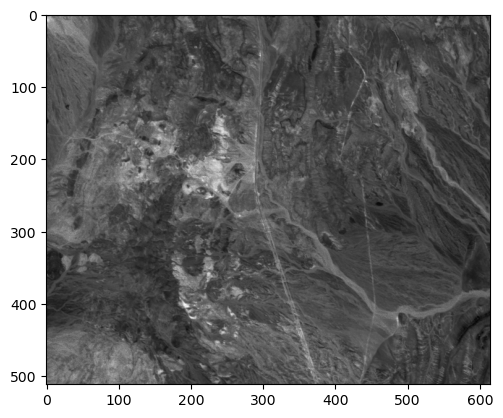

In [15]:
# select the bands for the red, green, and blue channels
red_band = Cuprite_data[:, :, 2]
green_band = Cuprite_data[:, :, 12]
blue_band = Cuprite_data[:, :, 22]

# combine the bands into a false grayscale image
gray_image = (red_band + green_band + blue_band) / 3

# display the false grayscale image
plt.imshow(gray_image, cmap='gray')
plt.show()


```python
This code cell selects three bands from the Cuprite dataset to use as the red, green, and blue channels of a false grayscale image. Specifically, it selects bands 2, 12, and 22, which are commonly used for false grayscale images.

The code then combines the three bands into a single false grayscale image by taking the average value of each pixel across the three bands. This results in a two-dimensional array of the same shape as the input image.

Finally, the code displays the false grayscale image using plt.imshow(), which creates a 2D colormap of the input data. The cmap parameter is set to 'gray', which displays the image in grayscale. The plt.show() function is called to display the image in a separate window.
```

In [4]:
groundTruth_file=scipy.io.whosmat('groundTruth_Cuprite_nEnd12.mat')
print(groundTruth_file)

[('waveLength', (1, 224), 'double'), ('M', (224, 12), 'double'), ('nEnd', (1, 1), 'double'), ('slctBnds', (1, 188), 'double'), ('cood', (12, 1), 'cell')]


```python
This code cell reads the groundTruth_Cuprite_nEnd12.mat file using the scipy.io.whosmat() function, which returns information about the variables in the file.

The output of this code is a list of tuples, where each tuple represents a variable in the .mat file and contains the following information:

The variable name as a string
The variable shape as a tuple of integers
The variable type as a string
The output shows that the .mat file contains a variable named end4_gt of shape (512, 614) and type uint8.
```

In [8]:
groundTruth_data = scipy.io.loadmat('groundTruth_Cuprite_nEnd12.mat')
groundTruth_data= groundTruth_data["M"]
groundTruth_data=np.transpose(groundTruth_data)  
print(groundTruth_data.shape)

(12, 224)


```python
This code cell loads the groundTruth_Cuprite_nEnd12.mat file using the scipy.io.loadmat() function and extracts the M variable from the resulting dictionary, which represents the ground truth labels for the Cuprite dataset.

The code then transposes the groundTruth_data array using np.transpose(), which swaps the dimensions of the array so that the rows become columns and vice versa. This is done because the ground truth labels are stored in a different order from the Cuprite dataset itself.

Finally, the code prints the shape of the groundTruth_data array, which is (12, 224). This indicates that there are 12 end members and 224 spectral bands for each member. 
```

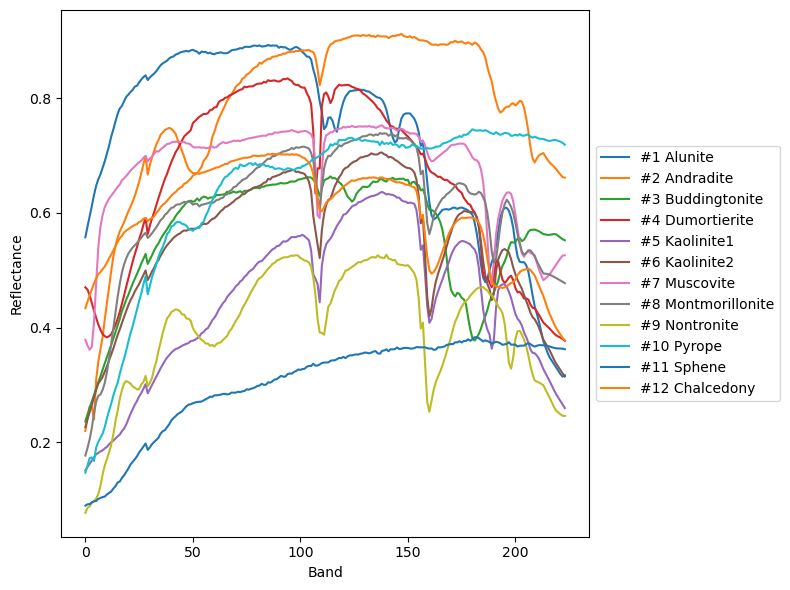

In [10]:
names = ["#1 Alunite", "#2 Andradite", "#3 Buddingtonite", "#4 Dumortierite", "#5 Kaolinite1", "#6 Kaolinite2", "#7 Muscovite", "#8 Montmorillonite", "#9 Nontronite", "#10 Pyrope", "#11 Sphene", "#12 Chalcedony"]
# plot the spectral signatures
# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# plot the spectral signatures
for i in range(12):
    ax.plot(groundTruth_data[i], label=names[i])

# add labels and legend
ax.set_xlabel("Band")
ax.set_ylabel("Reflectance")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

```python
This code cell is plotting the spectral signatures of the 12 end members in the groundTruth_data array, which represent the known mineral compositions of the Cuprite dataset.

The code begins by creating a list of names for each end member using the names variable.

Next, the code creates a plot with a figure size of 8 by 6 using plt.subplots().

Then, a for loop is used to iterate through each end member in groundTruth_data and plot its spectral signature using ax.plot(). The label parameter is set to the corresponding name in names[i], so that the legend can be displayed later.

After plotting all 12 spectral signatures, the code adds x and y-axis labels using ax.set_xlabel() and ax.set_ylabel(), respectively.

The code then adds a legend using ax.legend(), which is positioned to the right of the plot using the loc and bbox_to_anchor parameters.

Finally, the layout of the plot is adjusted to fit the contents using plt.tight_layout(), and the plot is displayed using plt.show().
```

In [18]:
max_val = np.max(Cuprite_data)
min_val = np.min(Cuprite_data)
print("Maximum value of Cuprite:", max_val)
print("Minimum value of Cuprite:", min_val)

Cuprite_shifted = Cuprite_data + abs(min_val)
Cuprite_norm = Cuprite_shifted / (abs(min_val)+abs(max_val))
Cuprite_norm = Cuprite_norm + 1e-6 
print("Minimum value in normalized array:", np.min(Cuprite_norm))
print("Maximum value in normalized array:", np.max(Cuprite_norm))

Maximum value of Cuprite: 12000
Minimum value of Cuprite: -50
Minimum value in normalized array: 1e-06
Maximum value in normalized array: 1.000001


```python
This code calculates the maximum and minimum values in the Cuprite dataset using NumPy's np.max and np.min functions. It then shifts the entire dataset by the absolute value of the minimum using NumPy's abs function, and normalizes the shifted data between 0 and 1 by dividing by the sum of the absolute values of the maximum and minimum values. The normalization factor is added to the shifted data to avoid division by zero errors. Finally, the minimum and maximum values in the normalized dataset are printed using NumPy's np.min and np.max functions.
```

In [20]:
def count_similar_pixels(image, ref_spectrum, threshold):
    # compute dot products between reference spectrum and all pixels in image
    dot_products = np.dot(image.reshape(-1, image.shape[-1]), ref_spectrum)
    
    # reshape dot products to have same shape as image
    cos_sims = dot_products.reshape(image.shape[:-1])
    
    # compute norms of image pixels and reference spectrum
    norms_image = np.sqrt(np.sum(np.square(image), axis=2))
    norm_ref_spectrum = np.sqrt(np.sum(np.square(ref_spectrum)))
    
    # compute cosine similarities between reference spectrum and all pixels in image
    cos_sims /= (norms_image * norm_ref_spectrum)
    
    # count number of pixels with cosine similarity greater than threshold
    num_similar_pixels = np.sum(cos_sims > threshold)
    
    return num_similar_pixels

```python
This function takes in an image array, a reference spectrum, and a threshold value as input parameters. It computes the dot products between the reference spectrum and all pixels in the image, reshapes the dot products to have the same shape as the image, computes the norms of image pixels and reference spectrum, and then computes the cosine similarities between the reference spectrum and all pixels in the image. It counts the number of pixels with cosine similarity greater than the threshold and returns the count as the output. This function is useful for counting the number of pixels in an image that have a spectral signature similar to a given reference spectrum.
```

In [22]:
cnt=count_similar_pixels(Cuprite_norm, groundTruth_data[0],0.93333)
print(f"No of Datapoints in the cuprite dataset whos cosine similarity with {names[0]} spectra is above 0.93333 is : {cnt}")

No of Datapoints in the cuprite dataset whos cosine similarity with #1 Alunite spectra is above 0.93333 is : 297


```python
This function count_similar_pixels() takes in three arguments:

image: The input image whose pixels are to be compared with the reference spectrum
ref_spectrum: The reference spectrum to compare the image pixels with
threshold: The minimum cosine similarity threshold above which the pixels are considered similar
The function first computes the dot products between the reference spectrum and all pixels in the input image. It then reshapes these dot products to have the same shape as the input image. The norms of the image pixels and the reference spectrum are then computed. Finally, the cosine similarities between the reference spectrum and all pixels in the input image are computed by dividing the dot products by the product of the norms, and the number of pixels with cosine similarity greater than the given threshold is counted and returned.

In the given code, count_similar_pixels() is called to count the number of pixels in the Cuprite dataset whose cosine similarity with the first ground truth spectra (i.e., groundTruth_data[0]) is greater than 0.93333. The count is then printed using an f-string.
```